# More Matplotlib Functionality

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import yfinance as yf

### Figures and Axes
* mpl object are these two objects
* this means you can create and access each 
* in general you must have a figure and then you can add axes (subplots)

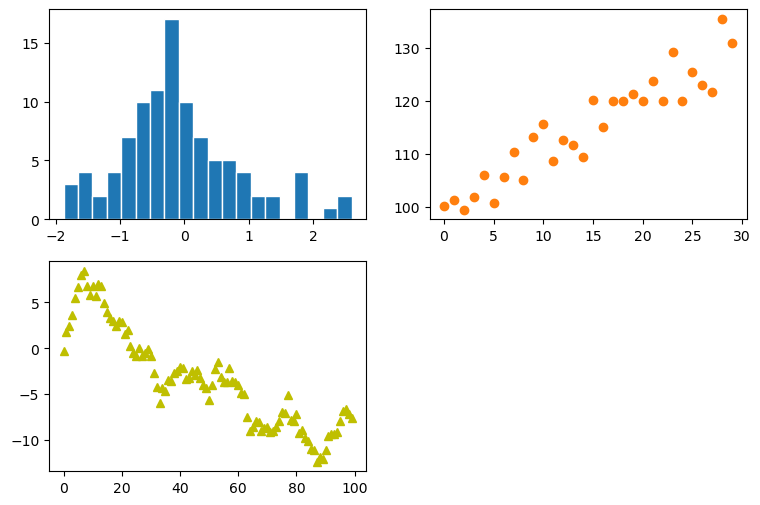

In [71]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(100).cumsum(), 'y^')
ax1.hist(np.random.randn(100), bins = 20, color="tab:blue", edgecolor='w')
ax2.scatter(np.arange(30), 100 + np.arange(30) + np.random.randn(30) * 3, c="tab:orange");

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

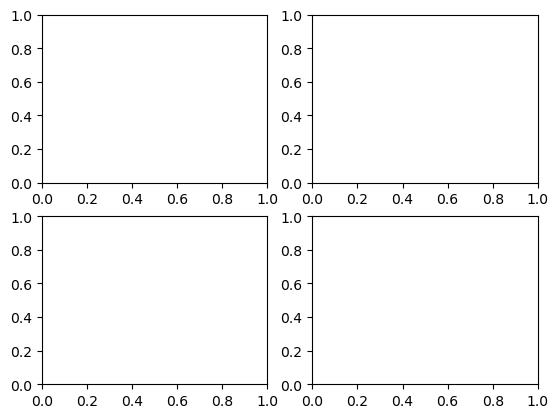

In [73]:
plt.subplots(2,2)


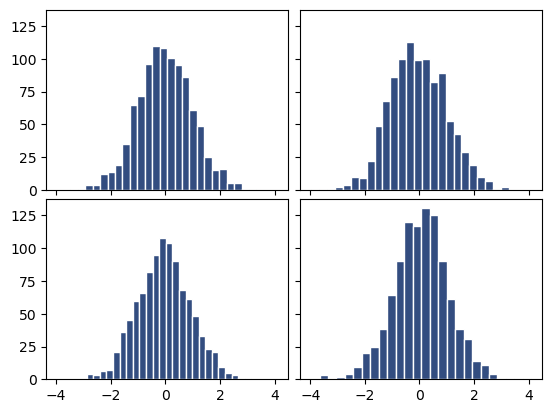

In [83]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for row in range(2):
    for plot in range(2):
        axes[row,plot].hist(np.random.randn(1000), bins=25, color=(.2,.3,.5), edgecolor='w')
plt.subplots_adjust(wspace=0.05, hspace=0.05)        


# Line Graphs

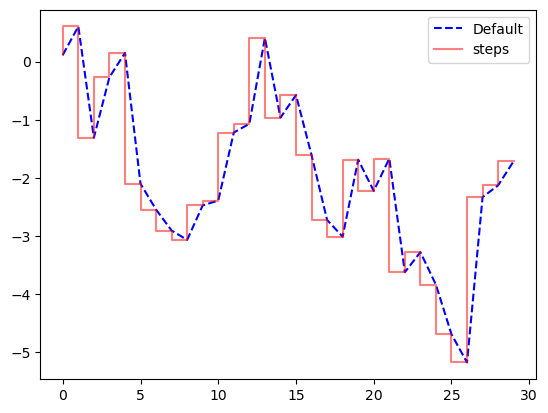

In [101]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'b--', label="Default")
plt.plot(data, drawstyle='steps-pre', c='r', alpha=.5, label="steps")
plt.legend(loc='best')

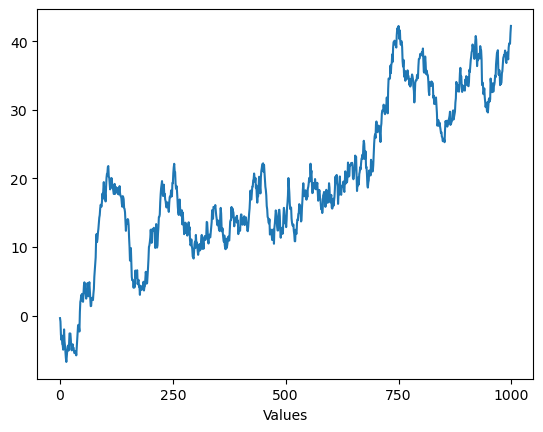

In [127]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750, 1000])
# labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=45)
plt.xlabel("Values");

In [129]:
data = yf.download("^GSPC", start="2007-01-01", end="2011-01-01", auto_adjust=False)["Close"]

[*********************100%***********************]  1 of 1 completed


In [131]:
data

Ticker,^GSPC
Date,
2007-01-03,1416.599976
2007-01-04,1418.339966
2007-01-05,1409.709961
2007-01-08,1412.839966
2007-01-09,1412.109985
...,...
2010-12-27,1257.540039
2010-12-28,1258.510010
2010-12-29,1259.780029


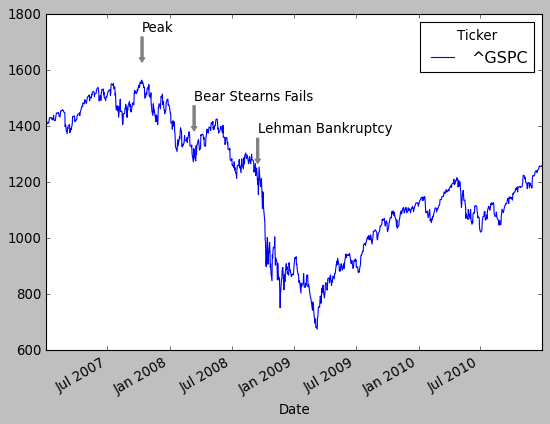

In [171]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data.plot(ax=ax)
crisis = [(datetime(2007,10,11), "Peak"), 
          (datetime(2008,3,12), "Bear Stearns Fails"), 
          (datetime(2008,9,15), "Lehman Bankruptcy")]

for date, event in crisis:
    ax.annotate(event, xy=(date, data.asof(date).mean() + 75),
    xytext=(date, data.asof(date).sum() + 225),
    arrowprops= dict(color='grey', headwidth= 5, width= 2, headlength=4), 
    horizontalalignment = "left", verticalalignment="top")
ax.set_ylim([600,1800]);    

# Themes
* https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [173]:
plt.style.use('ggplot')

# Scatter Plots
* Colormaps: https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py

In [190]:
data = yf.download(["GOOG", "AMZN"], start='2024-03-25', auto_adjust=False)['Close']
returns= np.log(data).diff()
returns.dropna(inplace=True)
returns.head()

[*********************100%***********************]  2 of 2 completed


Ticker,AMZN,GOOG
Date,,
2024-03-26,-0.007877,0.003632
2024-03-27,0.008544,0.001581
2024-03-28,0.003054,0.002104
2024-04-01,0.003266,0.027466
2024-04-02,-0.001548,-0.004034


(-0.1, 0.1)

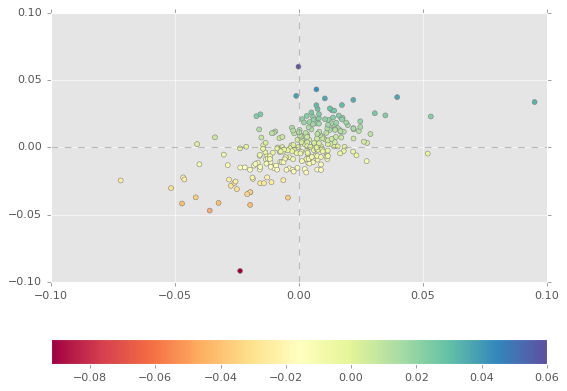

In [216]:
plt.scatter(returns.GOOG, returns.AMZN, c=returns.AMZN, cmap='Spectral', edgecolor='grey')
plt.colorbar(orientation='horizontal')
plt.axhline(0, c='grey', alpha=.5, ls="--")
plt.axvline(0, c='gray', alpha=.5, linestyle="--")
plt.ylim(-.1, .1)
plt.xlim(-.1,.1)

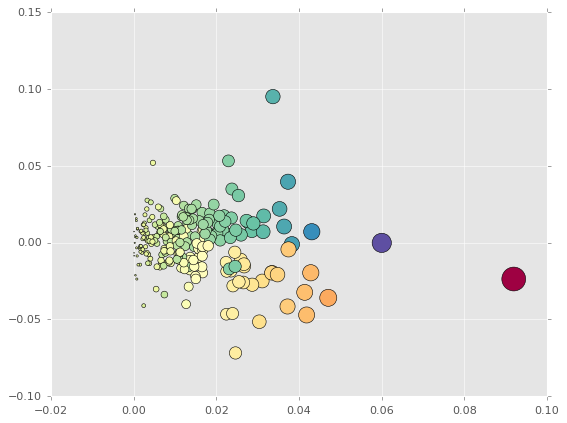

In [232]:
size = np.abs(returns.AMZN) * 5000
plt.scatter(np.abs(returns.AMZN), returns.GOOG, c=returns.AMZN, cmap='Spectral', edgecolor='k', s=size)

# Histograms & Bar Graphs

In [255]:
x = np.random.standard_normal(1000000)
y = np.random.normal(1,1,10000)

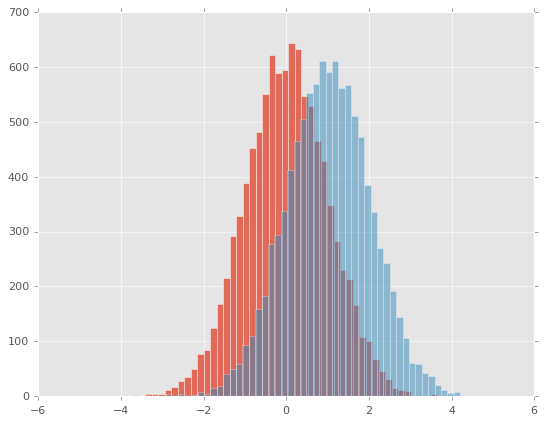

In [240]:
plt.hist(x, bins=50, edgecolor='w', alpha=.8)
plt.hist(y, bins=50, edgecolor='w', alpha=.5);

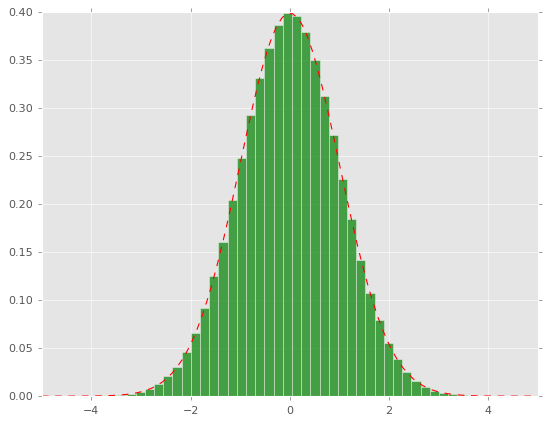

In [257]:
plt.xlim(-5,5)
plt.hist(x, bins=50, edgecolor='w', density=True, color='green', alpha=.7)
overlay = np.linspace(-5,5, 100)
mean = 0
std = 1
pdf = norm.pdf(overlay, mean, std)
plt.plot(overlay, pdf, 'r--');

In [327]:
groups = {"under 5": 6.8, "5 to 17": 18.9, "18 to 24": 9.6,
          "25 to 44": 30.2, "45 to 64": 22.1, "over 65": 12.4}

''

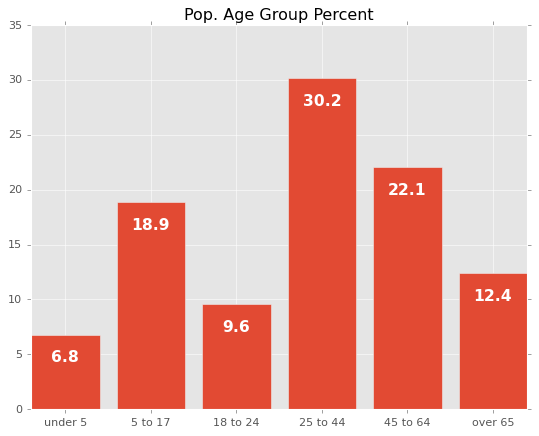

In [333]:
plt.title("Pop. Age Group Percent")
plt.bar(groups.keys(), groups.values())
for k,v in groups.items():
  plt.text(k,v - 2.5, v, fontsize=14, fontweight='bold', horizontalalignment='center', c='w')
;

In [261]:
groups.keys()

dict_keys(['under 5', '5 to 17', '18 to 24', '25 to 44', '45 to 64', 'over 65'])

In [335]:
x = list(groups.keys())
y = list(np.array(list(groups.values())) / 100)

[0.068, 0.18899999999999997, 0.096, 0.302, 0.221, 0.124]

''

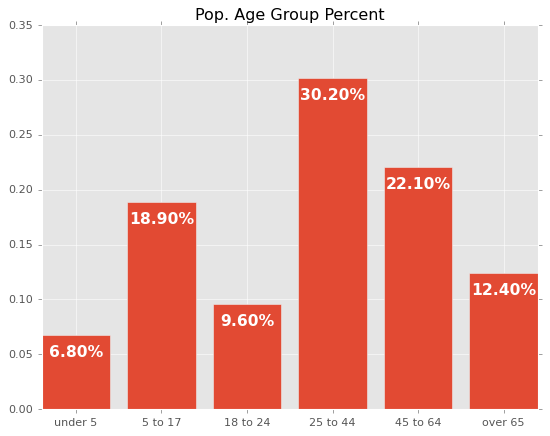

In [345]:
plt.title("Pop. Age Group Percent")
plt.bar(groups.keys(), y)
for bar in range(6):
    plt.text(x[bar],y[bar] - .02, f"{y[bar]:.2%}", fontsize=14, fontweight='bold', 
             horizontalalignment='center', c='w')
;